## CDC Diabetes Health Indicators Project - Modeling 
Creating a classifier model to distinguish between those with diabetes and those without diabetes \
[Link to CDC Diabetes Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [1]:
import pandas as pd
import numpy as np

# Read data
df_all = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
df_binary5050 = pd.read_csv("data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_binary = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")

### Logistic Regression model 
Create a logistic regression model that predicts whether someone has diabetes or not \
starting with the binary 50/50 diabetes/no-diabetes split data

In [2]:
## import the logistic regression method
from sklearn.linear_model import LogisticRegression
## import package to perform stratified test-train split
from sklearn.model_selection import train_test_split


In [3]:
df_binary5050.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


(array([35346.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 35346.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

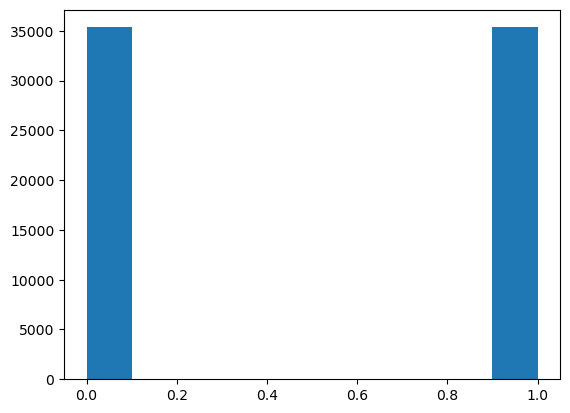

In [4]:
# Create a histogram showing number of diabetes vs non-diabetes
import matplotlib.pyplot as plt

plt.hist(df_binary5050.Diabetes_binary) 

In the 50/50 split dataset, there are 35,000 subjects with diabetes and 35,000 without.

In [5]:
# Get variable names
df_binary5050.keys()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
# Split train-test data
random_seed = 600

# Using variables with a Spearman's correlation > 0.2 (from EDA)
X = df_binary5050[['HighBP','PhysHlth','DiffWalk','BMI','GenHlth','HighChol','HeartDiseaseorAttack','Age']]

y = df_binary5050['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    shuffle=True,
                                                    random_state=random_seed,
                                                    stratify=y)

In [7]:
X_train

,HighBP,PhysHlth,DiffWalk,BMI,GenHlth,HighChol,HeartDiseaseorAttack,Age
35388,1.0,0.0,1.0,37.0,3.0,1.0,1.0,13.0
10262,1.0,20.0,0.0,37.0,5.0,0.0,0.0,9.0
5737,1.0,0.0,0.0,29.0,3.0,0.0,0.0,12.0
39284,1.0,3.0,0.0,30.0,3.0,0.0,0.0,8.0
68892,0.0,15.0,1.0,33.0,4.0,0.0,1.0,11.0
...,...,...,...,...,...,...,...,...
10693,0.0,0.0,0.0,27.0,2.0,0.0,0.0,5.0
69281,1.0,0.0,1.0,31.0,2.0,1.0,1.0,10.0
21726,0.0,0.0,0.0,17.0,3.0,0.0,0.0,13.0
34680,1.0,1.0,0.0,27.0,3.0,0.0,0.0,3.0


In [8]:
y_train

35388    1.0
10262    0.0
5737     0.0
39284    1.0
68892    1.0
        ... 
10693    0.0
69281    1.0
21726    0.0
34680    0.0
38969    1.0
Name: Diabetes_binary, Length: 56553, dtype: float64

In [9]:
# Fit the logistic regression model
clf = LogisticRegression(solver='liblinear')

clf.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

### Evaluating Logistic Regression Model
Using metrics such as Accuracy, Precision, Recall, AUC-ROC score

In [10]:
# Import evaluation metrics from sklearn
from sklearn.metrics import classification_report

In [11]:
# Predicting number of policies sold and probability of policies sold
test_pred = clf.predict(X_test)
test_prob = clf.predict_proba(X_test)[:,1]

# Classification Report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      7070
         1.0       0.73      0.75      0.74      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [12]:
# Get AUC-ROC score

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, test_pred)
auc(fpr, tpr)


0.7397279253621056

#### K-fold Cross-validation
Perform cross validation for hyperparameter tuning. K = 10.

In [13]:
# Importing packages

## import StratifiedKFold for cross validation
from sklearn.model_selection import StratifiedKFold

## import package to get cross validation scores
from sklearn.model_selection import cross_val_score

In [15]:
# Hyperparameter Tuning

logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [16]:
# Grid Search

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)
best_clf = clf.fit(X,y)


Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


C:\Users\chend\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7200 fits failed out of a total of 16000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chend\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chend\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\chend\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(

In [17]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334, max_iter=1000, penalty='l1',
                   solver='saga')

In [18]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.745
